<a href="https://colab.research.google.com/github/Nadezda-Sut/statistics_in_science/blob/main/child_adolesc.csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
from scipy.stats import shapiro

# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Load the data
file_path = "/content/gdrive/My Drive/working_memory/child_adolesc.csv"
data = pd.read_csv(file_path)

# Split data into two groups: children (0) and adolescents (1)
children_data = data[data['Ребенок(0)/Подросток(1)'] == 0]
adolescents_data = data[data['Ребенок(0)/Подросток(1)'] == 1]

# List of columns to test for normality
columns_to_test = [
    "WMem: Количество объектов, серия 1",
    "WMem: Количество объектов, серия 2",
    "WMem: Количество объектов, серия 3",
    "WMem: Время серии 1",
    "WMem: Время серии 2",
    "WMem: Время серии 3"
]

# Function to perform the Shapiro-Wilk test
def check_normality(data, columns):
    normality_results = {}
    for column in columns:
        stat, p_value = shapiro(data[column])
        normality_results[column] = (stat, p_value)
    return normality_results

# Check normality for children
children_normality = check_normality(children_data, columns_to_test)

# Check normality for adolescents
adolescents_normality = check_normality(adolescents_data, columns_to_test)

# Print results
print("Normality test results for children:")
for column, (stat, p_value) in children_normality.items():
    print(f"{column}: Statistics={stat}, p-value={p_value}")

print("\nNormality test results for adolescents:")
for column, (stat, p_value) in adolescents_normality.items():
    print(f"{column}: Statistics={stat}, p-value={p_value}")


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Normality test results for children:
WMem: Количество объектов, серия 1: Statistics=0.9406476057194831, p-value=0.008279016165252099
WMem: Количество объектов, серия 2: Statistics=0.9354512773884714, p-value=0.004989477802026705
WMem: Количество объектов, серия 3: Statistics=0.9193619801939121, p-value=0.0011277878267649283
WMem: Время серии 1: Statistics=0.9585600613824257, p-value=0.05206761260585255
WMem: Время серии 2: Statistics=0.6455908882435153, p-value=2.2922305142032234e-10
WMem: Время серии 3: Statistics=0.8602464617917981, p-value=1.143209470039587e-05

Normality test results for adolescents:
WMem: Количество объектов, серия 1: Statistics=0.9574296784581356, p-value=0.030837706900760927
WMem: Количество объектов, серия 2: Statistics=0.9309774578080728, p-value=0.001793996351274612
WMem: Количество объектов, серия 3: Statistics=0.9325075274428059

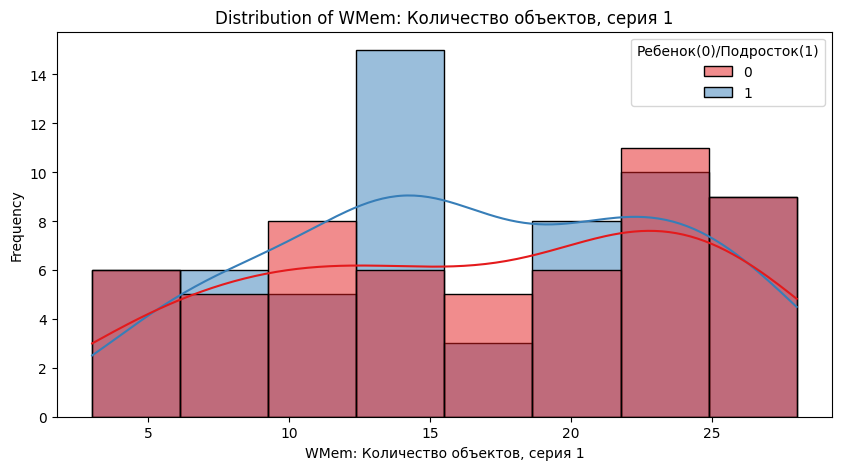

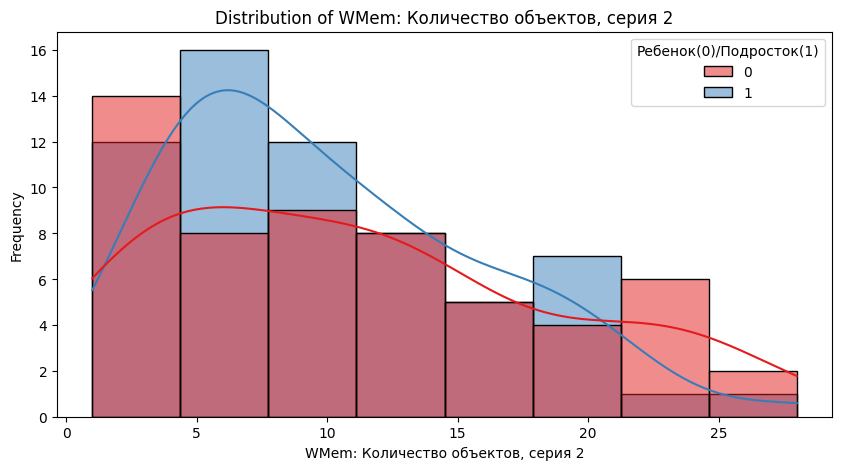

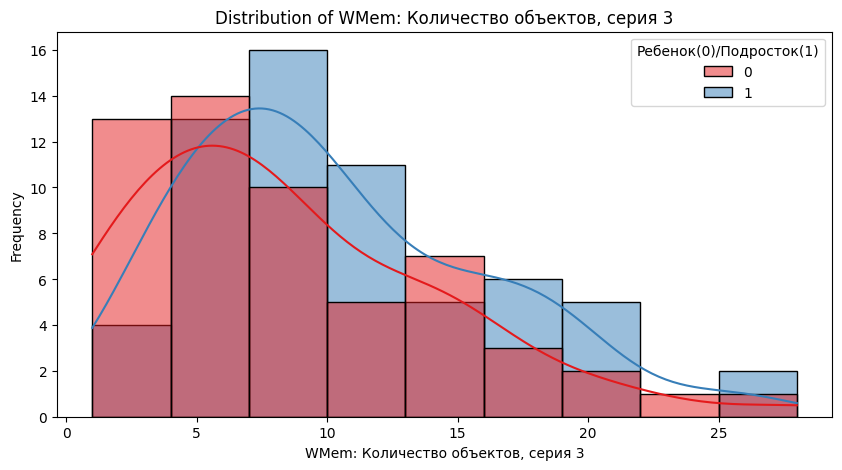

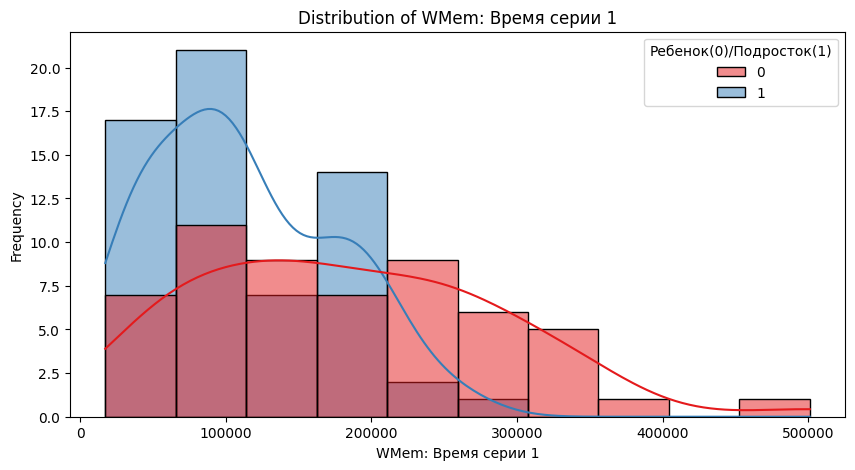

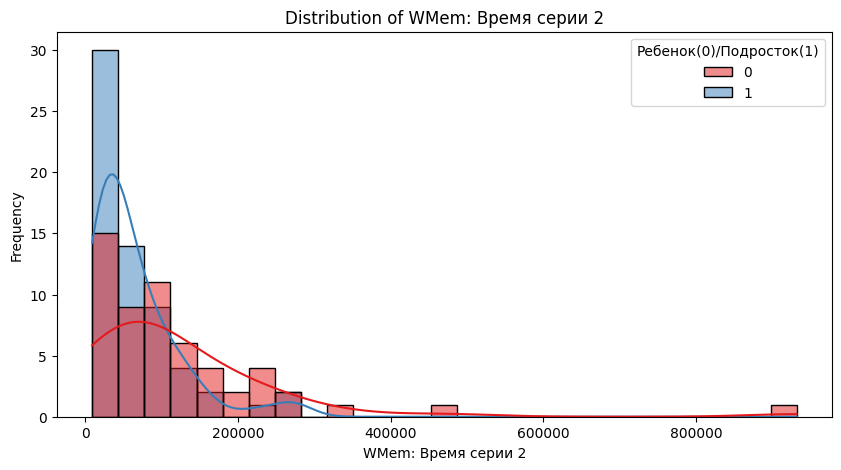

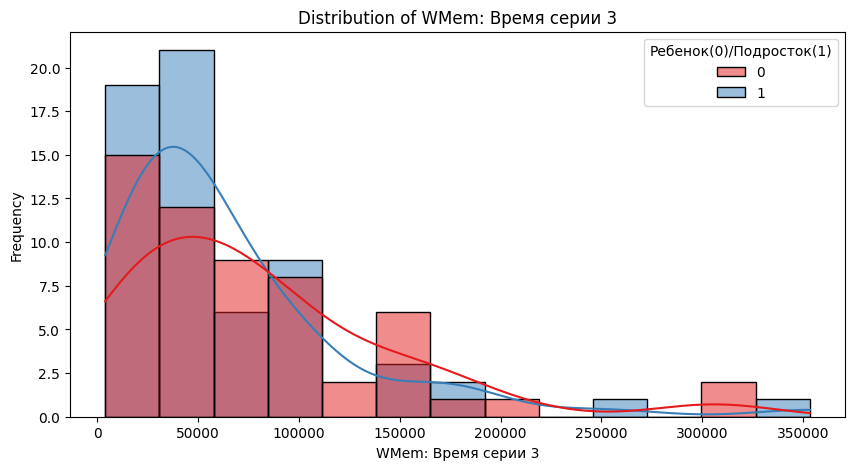

<ipython-input-2-56efbd6e2c57>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Ребенок(0)/Подросток(1)', y=column, palette="Set1")
<ipython-input-2-56efbd6e2c57>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Ребенок(0)/Подросток(1)', y=column, palette="Set1")
<ipython-input-2-56efbd6e2c57>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Ребенок(0)/Подросток(1)', y=column, palette="Set1")
<ipython-input-2-56efbd6e2c57>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecate

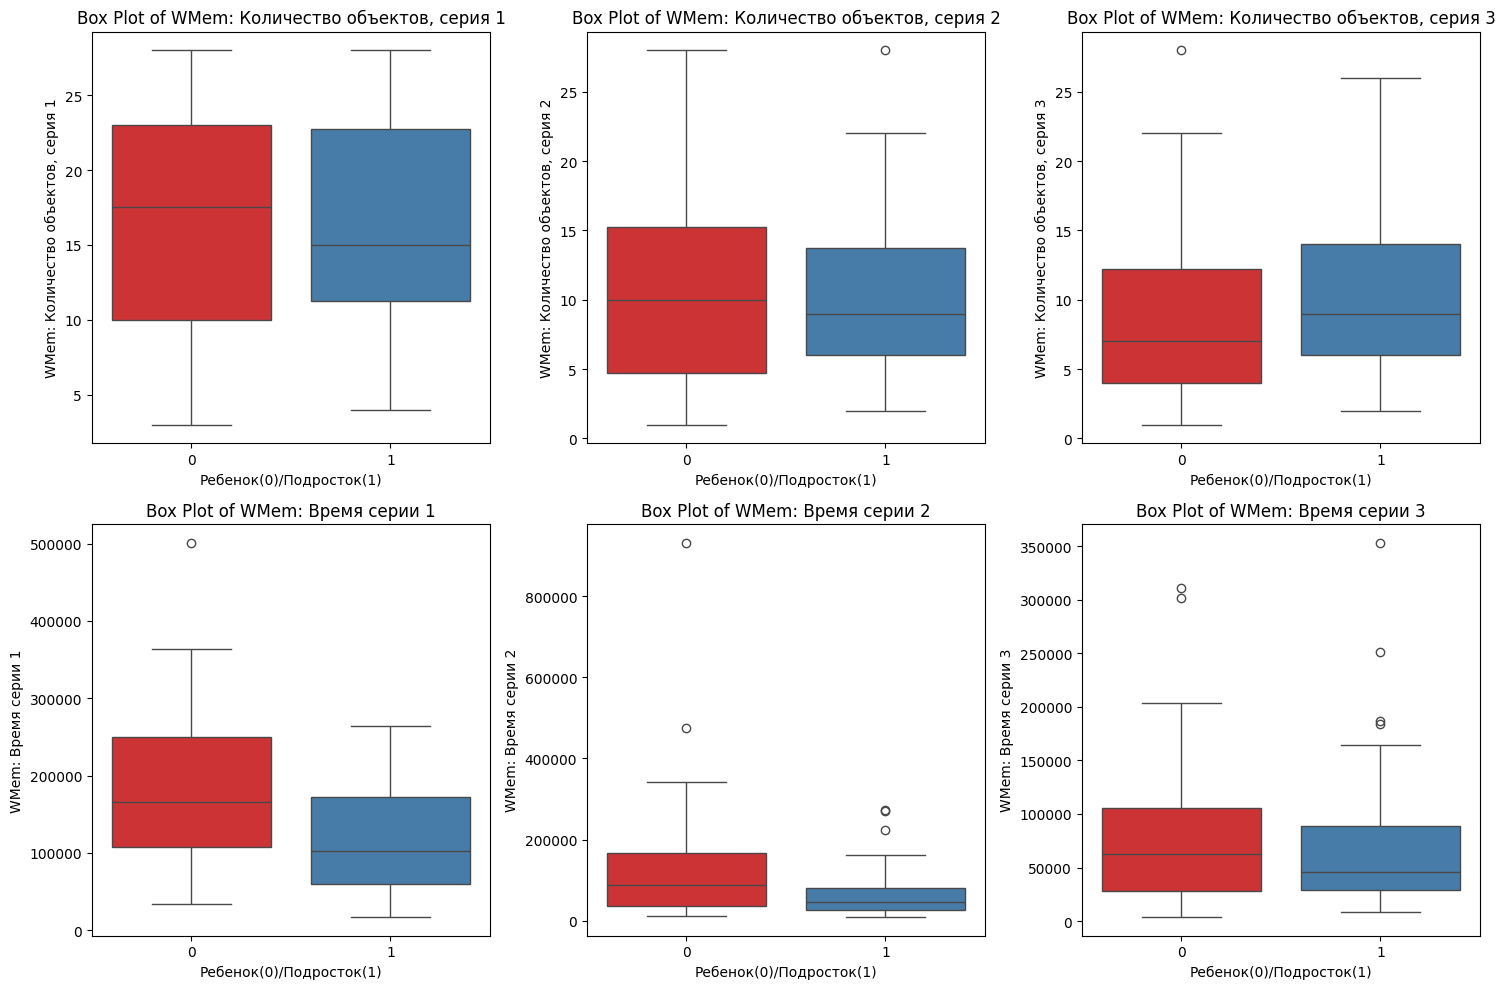

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Define the columns to visualize
columns_to_visualize = [
    "WMem: Количество объектов, серия 1",
    "WMem: Количество объектов, серия 2",
    "WMem: Количество объектов, серия 3",
    "WMem: Время серии 1",
    "WMem: Время серии 2",
    "WMem: Время серии 3"
]

# Define the groups
groups = ['Ребенок(0)/Подросток(1)']

# Create distribution plots
for column in columns_to_visualize:
    plt.figure(figsize=(10, 5))
    sns.histplot(data, x=column, hue='Ребенок(0)/Подросток(1)', kde=True, palette="Set1")
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Create box plots
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_visualize, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=data, x='Ребенок(0)/Подросток(1)', y=column, palette="Set1")
    plt.title(f'Box Plot of {column}')
    plt.xlabel('Ребенок(0)/Подросток(1)')
    plt.ylabel(column)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import skew, kurtosis


# Define the columns to analyze
columns_to_analyze = [
    "WMem: Количество объектов, серия 1",
    "WMem: Количество объектов, серия 2",
    "WMem: Количество объектов, серия 3",
    "WMem: Время серии 1",
    "WMem: Время серии 2",
    "WMem: Время серии 3"
]

# Split data into two groups: children (0) and adolescents (1)
children_data = data[data['Ребенок(0)/Подросток(1)'] == 0]
adolescents_data = data[data['Ребенок(0)/Подросток(1)'] == 1]

# Function to calculate skewness and kurtosis
def calculate_skewness_kurtosis(data, columns):
    results = {}
    for column in columns:
        skewness = skew(data[column])
        kurt = kurtosis(data[column])
        results[column] = (skewness, kurt)
    return results

# Calculate skewness and kurtosis for children
children_results = calculate_skewness_kurtosis(children_data, columns_to_analyze)

# Calculate skewness and kurtosis for adolescents
adolescents_results = calculate_skewness_kurtosis(adolescents_data, columns_to_analyze)

# Print the results
print("Skewness and Kurtosis for children:")
for column, (skewness, kurt) in children_results.items():
    print(f"{column}: Skewness={skewness}, Kurtosis={kurt}")

print("\nSkewness and Kurtosis for adolescents:")
for column, (skewness, kurt) in adolescents_results.items():
    print(f"{column}: Skewness={skewness}, Kurtosis={kurt}")


Skewness and Kurtosis for children:
WMem: Количество объектов, серия 1: Skewness=-0.1890946783587805, Kurtosis=-1.2022840903476495
WMem: Количество объектов, серия 2: Skewness=0.5298520242508836, Kurtosis=-0.7736365363426541
WMem: Количество объектов, серия 3: Skewness=1.0155257554509365, Kurtosis=0.9187143062181833
WMem: Время серии 1: Skewness=0.5569869692269809, Kurtosis=0.06668892202628962
WMem: Время серии 2: Skewness=3.579657256307976, Kurtosis=16.549924996961916
WMem: Время серии 3: Skewness=1.5286843597061892, Kurtosis=2.6449154195183153

Skewness and Kurtosis for adolescents:
WMem: Количество объектов, серия 1: Skewness=-0.06294281408595674, Kurtosis=-1.0839031027104735
WMem: Количество объектов, серия 2: Skewness=0.7760088177384687, Kurtosis=-0.04432664041497114
WMem: Количество объектов, серия 3: Skewness=0.7797412570643897, Kurtosis=-0.0537130814975586
WMem: Время серии 1: Skewness=0.4511157671604822, Kurtosis=-0.7492511017201569
WMem: Время серии 2: Skewness=1.969020640090

In [10]:
import pandas as pd
from scipy import stats

# Load the data
file_path = "/content/gdrive/My Drive/working_memory/child_adolesc_outliers.csv"
data = pd.read_csv(file_path)


# Разделение данных на две группы
children_data = data[data['Ребенок(0)/Подросток(1)'] == 0]
adolescents_data = data[data['Ребенок(0)/Подросток(1)'] == 1]

# Колонки для анализа
columns_to_check = [
    "WMem: Количество объектов, серия 1",
    "WMem: Количество объектов, серия 2",
    "WMem: Количество объектов, серия 3",
    "WMem: Время серии 1",
    "WMem: Время серии 2",
    "WMem: Время серии 3"
]

# Проверка нормальности распределения с помощью теста Шапиро-Уилка
normality_results = {}
for column in columns_to_check:
    stat_child, p_child = stats.shapiro(children_data[column])
    stat_adol, p_adol = stats.shapiro(adolescents_data[column])
    normality_results[column] = {
        "Child p-value": p_child,
        "Adolescent p-value": p_adol
    }

# Преобразование результатов в DataFrame
normality_results_df = pd.DataFrame(normality_results).T

# Проверка выбросов с помощью z-оценки
outliers = {}
for column in columns_to_check:
    z_scores_child = stats.zscore(children_data[column])
    z_scores_adol = stats.zscore(adolescents_data[column])
    outliers[column] = {
        "Child Outliers": children_data[z_scores_child.abs() > 3]['№'].tolist(),
        "Adolescent Outliers": adolescents_data[z_scores_adol.abs() > 3]['№'].tolist()
    }

# Преобразование результатов в DataFrame
outliers_df = pd.DataFrame(outliers)

# Вывод результатов
normality_results_df, outliers_df


(                                    Child p-value  Adolescent p-value
 WMem: Количество объектов, серия 1       0.024904            0.097663
 WMem: Количество объектов, серия 2       0.021231            0.011044
 WMem: Количество объектов, серия 3       0.011251            0.027586
 WMem: Время серии 1                      0.064874            0.054340
 WMem: Время серии 2                      0.000505            0.000083
 WMem: Время серии 3                      0.004194            0.000451,
                     WMem: Количество объектов, серия 1  \
 Child Outliers                                      []   
 Adolescent Outliers                                 []   
 
                     WMem: Количество объектов, серия 2  \
 Child Outliers                                      []   
 Adolescent Outliers                                 []   
 
                     WMem: Количество объектов, серия 3 WMem: Время серии 1  \
 Child Outliers                                      []          

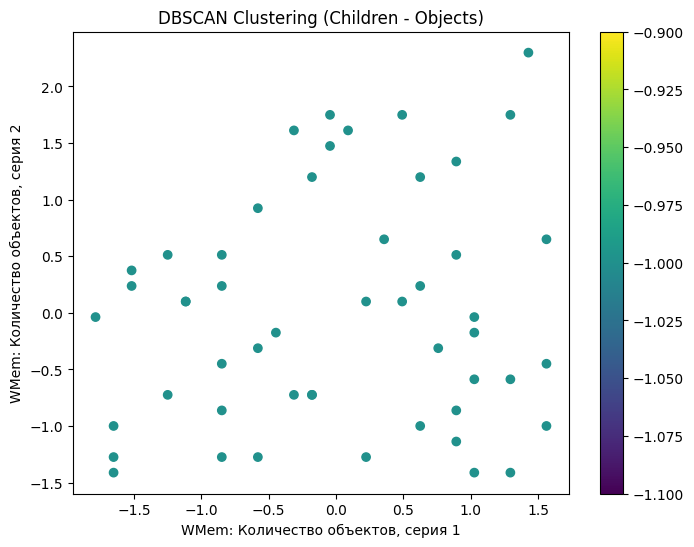

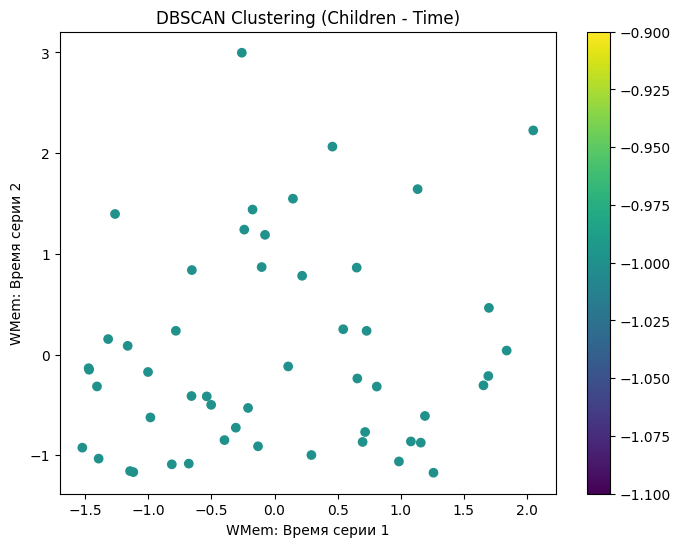

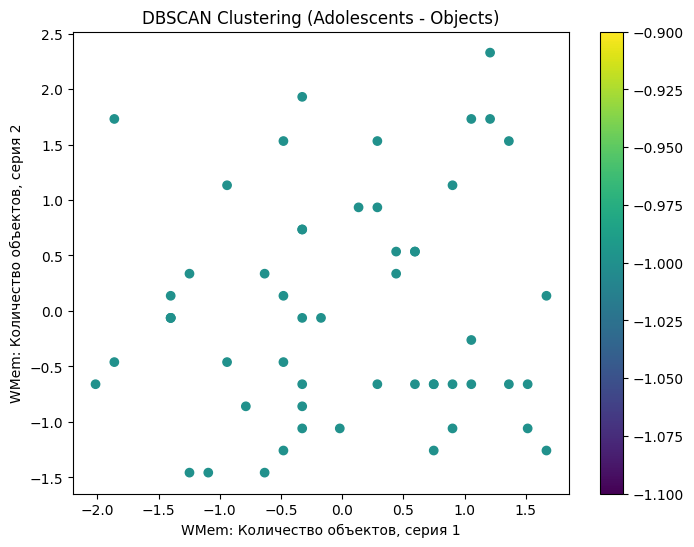

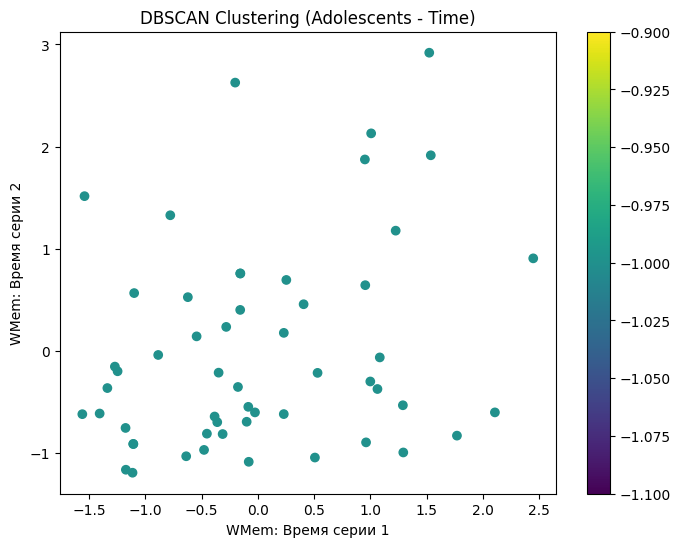

(array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1]),
 array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1]))

In [11]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Загрузка данных
file_path = "/content/gdrive/My Drive/working_memory/child_adolesc_outliers.csv"
data = pd.read_csv(file_path)

# Разделение данных на две группы
children_data = data[data['Ребенок(0)/Подросток(1)'] == 0]
adolescents_data = data[data['Ребенок(0)/Подросток(1)'] == 1]

# Переменные для кластеризации
object_columns = ["WMem: Количество объектов, серия 1", "WMem: Количество объектов, серия 2", "WMem: Количество объектов, серия 3"]
time_columns = ["WMem: Время серии 1", "WMem: Время серии 2", "WMem: Время серии 3"]

# Функция для применения DBSCAN и визуализации кластеров
def apply_dbscan(data, columns, eps=0.5, min_samples=5, title="DBSCAN Clustering"):
    # Масштабирование данных
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[columns])

    # Применение DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(scaled_data)

    # Визуализация кластеров
    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=clusters, cmap='viridis')
    plt.title(title)
    plt.xlabel(columns[0])
    plt.ylabel(columns[1])
    plt.colorbar(scatter)
    plt.show()

    return clusters

# Применение DBSCAN для каждой группы
child_clusters_objects = apply_dbscan(children_data, object_columns, title="DBSCAN Clustering (Children - Objects)")
child_clusters_time = apply_dbscan(children_data, time_columns, title="DBSCAN Clustering (Children - Time)")

adolescent_clusters_objects = apply_dbscan(adolescents_data, object_columns, title="DBSCAN Clustering (Adolescents - Objects)")
adolescent_clusters_time = apply_dbscan(adolescents_data, time_columns, title="DBSCAN Clustering (Adolescents - Time)")

# Возвращаем результаты кластеризации для анализа
child_clusters_objects, child_clusters_time, adolescent_clusters_objects, adolescent_clusters_time


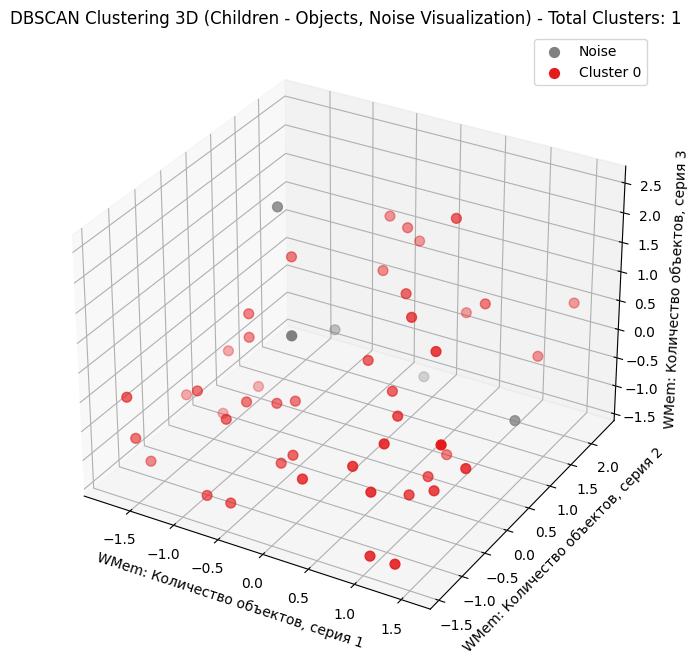

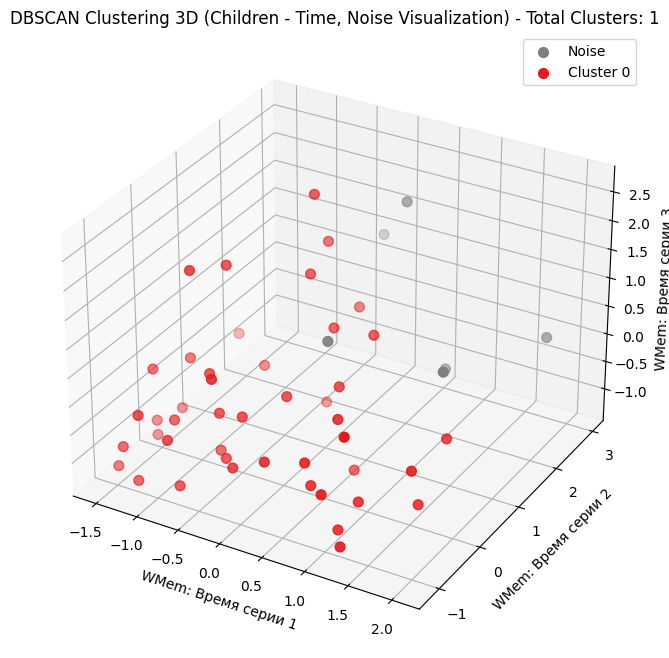

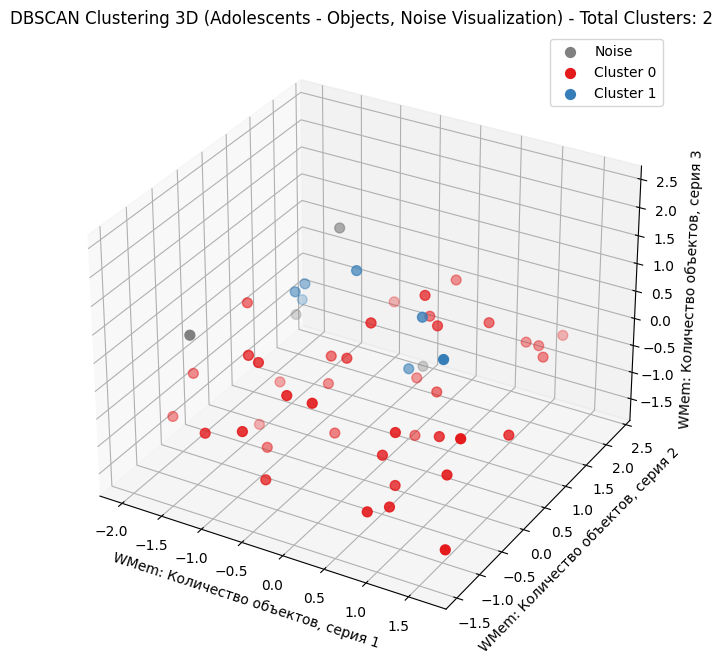

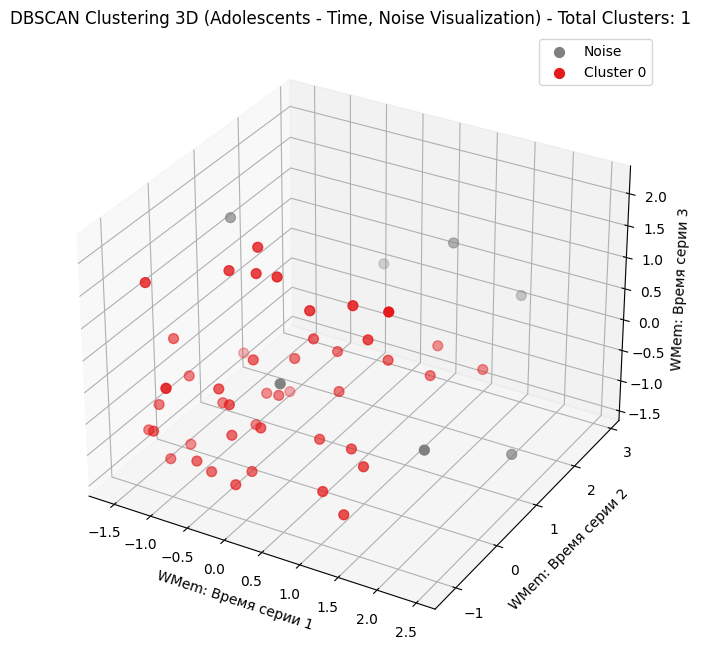

In [21]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Загрузка данных
file_path = "/content/gdrive/My Drive/working_memory/child_adolesc_outliers.csv"
data = pd.read_csv(file_path)

# Разделение данных на две группы
children_data = data[data['Ребенок(0)/Подросток(1)'] == 0]
adolescents_data = data[data['Ребенок(0)/Подросток(1)'] == 1]

# Переменные для кластеризации
object_columns = ["WMem: Количество объектов, серия 1", "WMem: Количество объектов, серия 2", "WMem: Количество объектов, серия 3"]
time_columns = ["WMem: Время серии 1", "WMem: Время серии 2", "WMem: Время серии 3"]

# Функция для применения DBSCAN с визуализацией шума и кластеров в 3D
def apply_dbscan_with_noise_visualization(data, columns, eps=1, min_samples=3, title="DBSCAN Clustering"):
    # Масштабирование данных
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[columns])

    # Применение DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(scaled_data)

    # Подсчет количества кластеров
    unique_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)

    # Визуализация кластеров в 3D
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Цвета для кластеров
    colors = plt.cm.Set1.colors

    # Визуализация шума
    noise_mask = clusters == -1
    ax.scatter(scaled_data[noise_mask, 0], scaled_data[noise_mask, 1], scaled_data[noise_mask, 2], c='gray', marker='o', s=50, label='Noise')

    # Визуализация кластеров
    for cluster_id in set(clusters):
        if cluster_id != -1:  # Исключаем шум
            cluster_mask = clusters == cluster_id
            ax.scatter(scaled_data[cluster_mask, 0], scaled_data[cluster_mask, 1], scaled_data[cluster_mask, 2],
                       c=[colors[cluster_id % len(colors)]], marker='o', s=50, label=f'Cluster {cluster_id}')

    ax.set_title(f"{title} - Total Clusters: {unique_clusters}")
    ax.set_xlabel(columns[0])
    ax.set_ylabel(columns[1])
    ax.set_zlabel(columns[2])

    plt.legend()
    plt.show()

    return unique_clusters, clusters

# Применение DBSCAN для каждой группы в 3D пространстве с визуализацией шума и кластеров
child_clusters_objects_3d_fixed_count, child_clusters_objects_3d_fixed_labels = apply_dbscan_with_noise_visualization(
    children_data, object_columns, title="DBSCAN Clustering 3D (Children - Objects, Noise Visualization)")

child_clusters_time_3d_fixed_count, child_clusters_time_3d_fixed_labels = apply_dbscan_with_noise_visualization(
    children_data, time_columns, title="DBSCAN Clustering 3D (Children - Time, Noise Visualization)")

adolescent_clusters_objects_3d_fixed_count, adolescent_clusters_objects_3d_fixed_labels = apply_dbscan_with_noise_visualization(
    adolescents_data, object_columns, title="DBSCAN Clustering 3D (Adolescents - Objects, Noise Visualization)")

adolescent_clusters_time_3d_fixed_count, adolescent_clusters_time_3d_fixed_labels = apply_dbscan_with_noise_visualization(
    adolescents_data, time_columns, title="DBSCAN Clustering 3D (Adolescents - Time, Noise Visualization)")


In [28]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objs as go


# Разделение данных на две группы
children_data = data[data['Ребенок(0)/Подросток(1)'] == 0]
adolescents_data = data[data['Ребенок(0)/Подросток(1)'] == 1]

# Разделение данных на две группы
children_data = data[data['Ребенок(0)/Подросток(1)'] == 0]
adolescents_data = data[data['Ребенок(0)/Подросток(1)'] == 1]

# Переменные для кластеризации
object_columns = ["WMem: Количество объектов, серия 1", "WMem: Количество объектов, серия 2", "WMem: Количество объектов, серия 3"]
time_columns = ["WMem: Время серии 1", "WMem: Время серии 2", "WMem: Время серии 3"]

# Функция для применения DBSCAN и создания интерактивного 3D-графика
def apply_dbscan_interactive_3d(data, columns, eps=1, min_samples=3, title="DBSCAN Clustering"):
    # Масштабирование данных
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(data[columns])

    # Применение DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(scaled_data)

    # Подсчет количества кластеров
    unique_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)

    # Создание интерактивного 3D-графика
    fig = px.scatter_3d(
        x=scaled_data[:, 0],
        y=scaled_data[:, 1],
        z=scaled_data[:, 2],
        color=clusters.astype(str),
        title=f"{title} - Total Clusters: {unique_clusters}",
        labels={'x': columns[0], 'y': columns[1], 'z': columns[2]}
    )

    # Добавление настроек отображения для лучшего визуального восприятия
    fig.update_traces(marker=dict(size=5, opacity=0.8))
    fig.update_layout(legend_title_text='Cluster', scene=dict(
        xaxis=dict(title=columns[0]),
        yaxis=dict(title=columns[1]),
        zaxis=dict(title=columns[2])
    ))

    fig.show()

    return unique_clusters, clusters

# Применение DBSCAN для каждой группы с интерактивной визуализацией
child_clusters_objects_3d_interactive_count, child_clusters_objects_3d_interactive_labels = apply_dbscan_interactive_3d(
    children_data, object_columns, title="DBSCAN Clustering 3D (Children - Objects)")

child_clusters_time_3d_interactive_count, child_clusters_time_3d_interactive_labels = apply_dbscan_interactive_3d(
    children_data, time_columns, title="DBSCAN Clustering 3D (Children - Time)")

adolescent_clusters_objects_3d_interactive_count, adolescent_clusters_objects_3d_interactive_labels = apply_dbscan_interactive_3d(
    adolescents_data, object_columns, title="DBSCAN Clustering 3D (Adolescents - Objects)")

adolescent_clusters_time_3d_interactive_count, adolescent_clusters_time_3d_interactive_labels = apply_dbscan_interactive_3d(
    adolescents_data, time_columns, title="DBSCAN Clustering 3D (Adolescents - Time)")
